In [1]:
#pip install whisper openai diffusers pydub


In [2]:
#from google.colab import drive
#drive.mount('/content/drive')

In [3]:
#pip install moviepy speechrecognition transformers pillow


In [4]:
import moviepy.editor as mp

def extract_audio(video_path, audio_path):
    video = mp.VideoFileClip(video_path)
    audio = video.audio
    audio.write_audiofile(audio_path)
    print(f"Audio extracted and saved to {audio_path}")

# Example usage
video_path = '/content/drive/MyDrive/Datasciencedemo.mp4'
audio_path = 'extracted_audio.wav'
extract_audio(video_path, audio_path)


MoviePy - Writing audio in extracted_audio.wav


MoviePy - Done.
Audio extracted and saved to extracted_audio.wav


In [5]:
import whisper

def audio_to_text(audio_path, text_path):
    # Load the Whisper model
    model = whisper.load_model("base")

    # Transcribe the audio
    result = model.transcribe(audio_path)
    text = result["text"]

    # Save the transcribed text to a file
    with open(text_path, 'w') as file:
        file.write(text)

    print(f"Text transcribed and saved to {text_path}")
    return text

# Example usage
audio_path = 'extracted_audio.wav'
text_path = 'transcribed_text.txt'
text = audio_to_text(audio_path, text_path)


100%|███████████████████████████████████████| 139M/139M [00:02<00:00, 66.1MiB/s]


Text transcribed and saved to transcribed_text.txt


In [6]:
# Open and read the contents of the transcribed text file
with open(text_path, 'r') as file:
    transcribed_text = file.read()

# Print the transcribed text
print("Transcribed Text:")
print(transcribed_text)


Transcribed Text:
 Are you one of the many who dreams of becoming a data scientist? Keep watching this video if you're passionate about data science because we will tell you how does it really work under the hood. Emma is a data scientist. Let's see how a day in a life goes while she's working on a data science project. Well, it is very important to understand the business problem first. In our meeting with the clients, Emma asks relevant questions, understands and defines objectives for the problem that needs to be tackled. She's a curious soul who asks a lot of lies. One of the many traits of a good data scientist. Now, she cares up for data acquisition. To gather and scrape data from multiple sources like web servers, logs, databases, APIs and online repositories. Oh, it seems like finding the right data takes both time and effort. After the data is gathered, comes data preparation. This step involves data cleaning and data transformation. Data cleaning is the most time consuming pr

In [7]:
#pip install --upgrade whisper


In [8]:
#pip install openai-whisper


In [9]:
#pip install openai==0.28

In [10]:
#pip install transformers


In [11]:
from transformers import BartForConditionalGeneration, BartTokenizer

def summarize_text(text, summary_path):
    # Load pre-trained BART model and tokenizer
    model_name = "facebook/bart-large-cnn"
    tokenizer = BartTokenizer.from_pretrained(model_name)
    model = BartForConditionalGeneration.from_pretrained(model_name)

    # Encode the input text
    inputs = tokenizer.encode("summarize: " + text, return_tensors="pt", max_length=1024, truncation=True)

    # Generate summary
    summary_ids = model.generate(inputs, max_length=150, min_length=40, length_penalty=2.0, num_beams=4, early_stopping=True)
    summary = tokenizer.decode(summary_ids[0], skip_special_tokens=True)

    # Save the summary to a file
    with open(summary_path, 'w') as file:
        file.write(summary)

    print(f"Summarized text saved to {summary_path}")
    return summary

# Example usage
text_path = 'transcribed_text.txt'
summary_path = 'summarized_text.txt'

# Read the transcribed text from the file
with open(text_path, 'r') as file:
    transcribed_text = file.read()

# Summarize the transcribed text
summarized_text = summarize_text(transcribed_text, summary_path)

# Print the summarized text
print("Summarized Text:")
print(summarized_text)


The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(



vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.58k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

Summarized text saved to summarized_text.txt
Summarized Text:
The median base salaries of a data scientist can range from $95,000 to $165,000. With data science, it is possible to not only predict employee aftertition, but also understand the key variables that influence employment turnover. Data science techniques along with genomic data provides a deeper understanding of genetic issues in reaction to particular drugs and diseases.


In [12]:
#pip install transformers diffusers torch torchvision torchaudio


In [13]:
from transformers import BartForConditionalGeneration, BartTokenizer
from diffusers import StableDiffusionPipeline
import torch
from PIL import Image

# Function to summarize text
def summarize_text(text, summary_path):
    model_name = "facebook/bart-large-cnn"
    tokenizer = BartTokenizer.from_pretrained(model_name)
    model = BartForConditionalGeneration.from_pretrained(model_name)

    inputs = tokenizer.encode("summarize: " + text, return_tensors="pt", max_length=1024, truncation=True)
    summary_ids = model.generate(inputs, max_length=150, min_length=40, length_penalty=2.0, num_beams=4, early_stopping=True)
    summary = tokenizer.decode(summary_ids[0], skip_special_tokens=True)

    with open(summary_path, 'w') as file:
        file.write(summary)

    print(f"Summarized text saved to {summary_path}")
    return summary

# Function to create an image banner based on summarized text
def create_image_banner(summary_text, image_path):
    model_id = "CompVis/stable-diffusion-v1-4"  # or use another model if available
    device = "cuda" if torch.cuda.is_available() else "cpu"

    pipe = StableDiffusionPipeline.from_pretrained(model_id)
    pipe = pipe.to(device)

    with torch.no_grad():
        image = pipe(summary_text).images[0]

    image.save(image_path)
    print(f"Banner image created and saved to {image_path}")

# Example usage
text_path = 'transcribed_text.txt'
summary_path = 'summarized_text.txt'
image_path = 'banner_image.png'

# Read the transcribed text from the file
with open(text_path, 'r') as file:
    transcribed_text = file.read()

# Summarize the transcribed text
summarized_text = summarize_text(transcribed_text, summary_path)

# Print the summarized text
print("Summarized Text:")
print(summarized_text)

# Create an image banner based on the summarized text
create_image_banner(summarized_text, image_path)



Summarized text saved to summarized_text.txt
Summarized Text:
The median base salaries of a data scientist can range from $95,000 to $165,000. With data science, it is possible to not only predict employee aftertition, but also understand the key variables that influence employment turnover. Data science techniques along with genomic data provides a deeper understanding of genetic issues in reaction to particular drugs and diseases.


model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

Fetching 16 files:   0%|          | 0/16 [00:00<?, ?it/s]

safety_checker/config.json:   0%|          | 0.00/4.56k [00:00<?, ?B/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

(…)kpoints/scheduler_config-checkpoint.json:   0%|          | 0.00/209 [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/313 [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/592 [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/551 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

Token indices sequence length is longer than the specified maximum sequence length for this model (82 > 77). Running this sequence through the model will result in indexing errors
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['particular drugs and diseases.']


  0%|          | 0/50 [00:00<?, ?it/s]

Banner image created and saved to banner_image.png


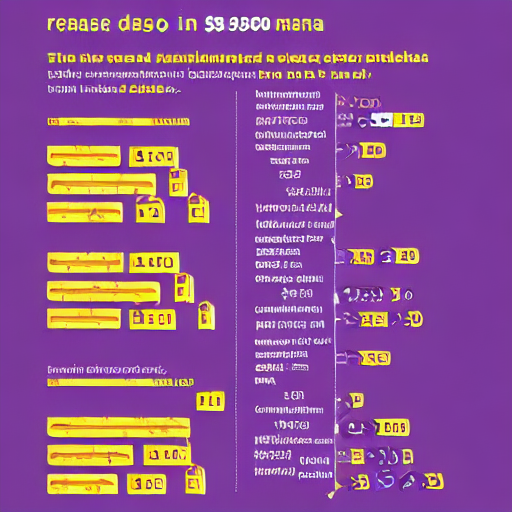

In [14]:
from IPython.display import Image as IPImage, display

# Display the generated image
display(IPImage(filename="banner_image.png"))


In [15]:
from transformers import BartForConditionalGeneration, BartTokenizer
from diffusers import StableDiffusionPipeline
import torch
from PIL import Image

# Function to summarize text
def summarize_text(text, summary_path):
    model_name = "facebook/bart-large-cnn"
    tokenizer = BartTokenizer.from_pretrained(model_name)
    model = BartForConditionalGeneration.from_pretrained(model_name)

    inputs = tokenizer.encode("summarize: " + text, return_tensors="pt", max_length=1024, truncation=True)
    summary_ids = model.generate(inputs, max_length=150, min_length=40, length_penalty=2.0, num_beams=4, early_stopping=True)
    summary = tokenizer.decode(summary_ids[0], skip_special_tokens=True)

    with open(summary_path, 'w') as file:
        file.write(summary)

    print(f"Summarized text saved to {summary_path}")
    return summary

# Function to create an image banner based on summarized text
def create_image_banner(summary_text, image_path):
    model_id = "CompVis/stable-diffusion-v1-4"
    device = "cuda" if torch.cuda.is_available() else "cpu"

    pipe = StableDiffusionPipeline.from_pretrained(model_id)
    pipe = pipe.to(device)

    # Explicitly mention language and context
    prompt = f"A detailed and clear banner image for an educational video titled: '{summary_text}'. The image should be informative, in English, and relevant to the topic."

    with torch.no_grad():
        image = pipe(prompt).images[0]

    image.save(image_path)
    print(f"Banner image created and saved to {image_path}")

# Example usage
text_path = 'transcribed_text.txt'
summary_path = 'summarized_text.txt'
image_path = 'banner_image.png'

# Read the transcribed text from the file
with open(text_path, 'r') as file:
    transcribed_text = file.read()

# Summarize the transcribed text
summarized_text = summarize_text(transcribed_text, summary_path)

# Print the summarized text
print("Summarized Text:")
print(summarized_text)

# Create an image banner based on the summarized text
create_image_banner(summarized_text, image_path)


Summarized text saved to summarized_text.txt
Summarized Text:
The median base salaries of a data scientist can range from $95,000 to $165,000. With data science, it is possible to not only predict employee aftertition, but also understand the key variables that influence employment turnover. Data science techniques along with genomic data provides a deeper understanding of genetic issues in reaction to particular drugs and diseases.


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

Token indices sequence length is longer than the specified maximum sequence length for this model (111 > 77). Running this sequence through the model will result in indexing errors
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ["with genomic data provides a deeper understanding of genetic issues in reaction to particular drugs and diseases.'. the image should be informative, in english, and relevant to the topic."]


  0%|          | 0/50 [00:00<?, ?it/s]

Banner image created and saved to banner_image.png


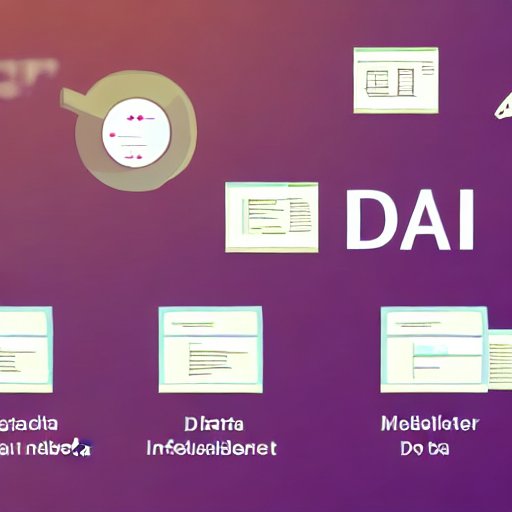

In [16]:
from IPython.display import Image as IPImage, display

# Display the generated image
display(IPImage(filename="banner_image.png"))


Summarized text saved to summarized_text.txt
Summarized Text:
The median base salaries of a data scientist can range from $95,000 to $165,000. With data science, it is possible to not only predict employee aftertition, but also understand the key variables that influence employment turnover. Data science techniques along with genomic data provides a deeper understanding of genetic issues in reaction to particular drugs and diseases.


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

Token indices sequence length is longer than the specified maximum sequence length for this model (162 > 77). Running this sequence through the model will result in indexing errors
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ["understand the key variables that influence employment turnover. data science techniques along with genomic data provides a deeper understanding of genetic issues in reaction to particular drugs and diseases.'. the image should include elements that represent key concepts or themes from the summary. use a clean and modern design, with clear text in english, and ensure it is easy to understand. include appropriate symbols, illustrations, or icons that reflect the educational content."]


  0%|          | 0/50 [00:00<?, ?it/s]

Banner image created and saved to banner_image.png


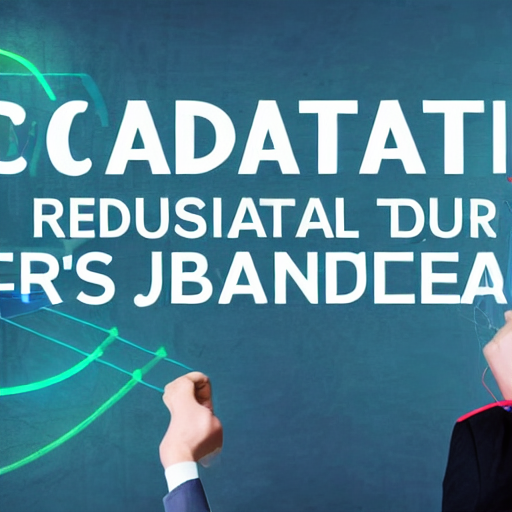

In [19]:
from transformers import BartForConditionalGeneration, BartTokenizer
from diffusers import StableDiffusionPipeline
import torch
from PIL import Image

# Function to summarize text
def summarize_text(text, summary_path):
    model_name = "facebook/bart-large-cnn"
    tokenizer = BartTokenizer.from_pretrained(model_name)
    model = BartForConditionalGeneration.from_pretrained(model_name)

    inputs = tokenizer.encode("summarize: " + text, return_tensors="pt", max_length=1024, truncation=True)
    summary_ids = model.generate(inputs, max_length=150, min_length=40, length_penalty=2.0, num_beams=4, early_stopping=True)
    summary = tokenizer.decode(summary_ids[0], skip_special_tokens=True)

    with open(summary_path, 'w') as file:
        file.write(summary)

    print(f"Summarized text saved to {summary_path}")
    return summary

# Function to create an image banner based on summarized text
def create_image_banner(summary_text, image_path):
    model_id = "CompVis/stable-diffusion-v1-4"
    device = "cuda" if torch.cuda.is_available() else "cpu"

    pipe = StableDiffusionPipeline.from_pretrained(model_id)
    pipe = pipe.to(device)

    # Explicit and detailed prompt
    prompt = (f"Create a professional and visually appealing banner image for an educational video. "
              f"The banner should clearly depict the topic of the video, which is: '{summary_text}'. "
              "The image should include elements that represent key concepts or themes from the summary. "
              "Use a clean and modern design, with clear text in English, and ensure it is easy to understand. "
              "Include appropriate symbols, illustrations, or icons that reflect the educational content.")

    with torch.no_grad():
        image = pipe(prompt).images[0]

    image.save(image_path)
    print(f"Banner image created and saved to {image_path}")

# Example usage
text_path = 'transcribed_text.txt'
summary_path = 'summarized_text.txt'
image_path = 'banner_image.png'

# Read the transcribed text from the file
with open(text_path, 'r') as file:
    transcribed_text = file.read()

# Summarize the transcribed text
summarized_text = summarize_text(transcribed_text, summary_path)

# Print the summarized text
print("Summarized Text:")
print(summarized_text)

# Create an image banner based on the summarized text
create_image_banner(summarized_text, image_path)

from IPython.display import Image as IPImage, display

# Display the generated image
display(IPImage(filename="banner_image.png"))



Summarized text saved to summarized_text.txt
transcribed_text:
 Are you one of the many who dreams of becoming a data scientist? Keep watching this video if you're passionate about data science because we will tell you how does it really work under the hood. Emma is a data scientist. Let's see how a day in a life goes while she's working on a data science project. Well, it is very important to understand the business problem first. In our meeting with the clients, Emma asks relevant questions, understands and defines objectives for the problem that needs to be tackled. She's a curious soul who asks a lot of lies. One of the many traits of a good data scientist. Now, she cares up for data acquisition. To gather and scrape data from multiple sources like web servers, logs, databases, APIs and online repositories. Oh, it seems like finding the right data takes both time and effort. After the data is gathered, comes data preparation. This step involves data cleaning and data transformation

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

Token indices sequence length is longer than the specified maximum sequence length for this model (987 > 77). Running this sequence through the model will result in indexing errors
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ["'s see how a day in a life goes while she's working on a data science project. well, it is very important to understand the business problem first. in our meeting with the clients, emma asks relevant questions, understands and defines objectives for the problem that needs to be tackled. she's a curious soul who asks a lot of lies. one of the many traits of a good data scientist. now, she cares up for data acquisition. to gather and scrape data from multiple sources like web servers, logs, databases, apis and online repositories. oh, it seems like finding the right data takes both time and effort. after the data is gathered, comes data preparation. this step involves data cleaning and data transformation. 

  0%|          | 0/50 [00:00<?, ?it/s]

Banner image created and saved to banner_image.png


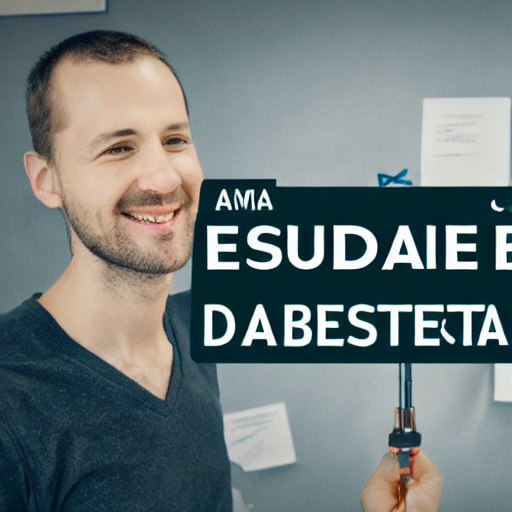

In [21]:
from transformers import BartForConditionalGeneration, BartTokenizer
from diffusers import StableDiffusionPipeline
import torch
from PIL import Image

# Function to create an image banner based on summarized text
def create_image_banner(summary_text, image_path):
    model_id = "CompVis/stable-diffusion-v1-4"
    device = "cuda" if torch.cuda.is_available() else "cpu"

    pipe = StableDiffusionPipeline.from_pretrained(model_id)
    pipe = pipe.to(device)

    # Explicit and detailed prompt
    prompt = (f"Create a professional and visually appealing banner image for an educational video. "
              f"The banner should clearly depict the topic of the video, which is: '{transcribed_text}'. "
              "The image should include elements that represent key concepts or themes from the summary. "
              "Use a clean and modern design, with clear text in English, and ensure it is easy to understand. "
              "Include appropriate symbols, illustrations, or icons that reflect the educational content.")

    with torch.no_grad():
        image = pipe(prompt).images[0]

    image.save(image_path)
    print(f"Banner image created and saved to {image_path}")

# Example usage
text_path = 'transcribed_text.txt'
image_path = 'banner_image.png'

# Read the transcribed text from the file
with open(text_path, 'r') as file:
    transcribed_text = file.read()



# Print the summarized text
print("transcribed_text:")
print(transcribed_text)

# Create an image banner based on the summarized text
create_image_banner(transcribed_text, image_path)

from IPython.display import Image as IPImage, display

# Display the generated image
display(IPImage(filename="banner_image.png"))

